In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

In [2]:
class Neuron():
    def __init__(self, ninputs):
        self._weights = np.random.randn(ninputs) * 0.01
        self._bias = np.random.randn() * 0.01
    
    def predict(self, X):
        x = np.atleast_2d(X)
        v = x @ self._weights + self._bias
        return self.activate(v)
    
    def error(self, X, y):
        yp = self.predict(X)
        e = 0.5 * (y - yp) ** 2
        return e
    
    def delta(self, X, y):
        yp = self.predict(X)
        return (y - yp)
    
    def fit(self, X, y, lr=0.01):
        yp = self.predict(X)
        e = y - yp
        self._weights += lr * X * e * self.derivative(yp)
        self._bias += lr * e * self.derivative(yp)
    
    def activate(self, x):
        return 1.0 / (1.0 + np.exp(-x))
    
    def derivative(self, x):
        return self.activate(x) * (1 - self.activate(x))

In [3]:
X = np.random.randn(900).reshape((-1, 3))
y = X[:,0] * 2 + X[:,1] * 0.5 + X[:, 2] * 1 + 4.0 + np.random.randn(300) * 0.05

In [4]:
n = Neuron(3)

In [5]:
np.mean(n.error(X, y))

8.360018786931514

In [6]:
n_epochs = 1000
epochs = range(n_epochs)
errors = []
biases = [n._bias]
w0 = [n._weights[0]]
w1 = [n._weights[1]]
w2 = [n._weights[2]]

for epoch in epochs:
    for Xi, yi in zip(X, y):
        n.fit(Xi, yi, lr=0.001)

    errors.append(np.mean(n.error(X, y)))
    biases.append(n._bias)
    w0.append(n._weights[0])
    w1.append(n._weights[1])
    w2.append(n._weights[2])

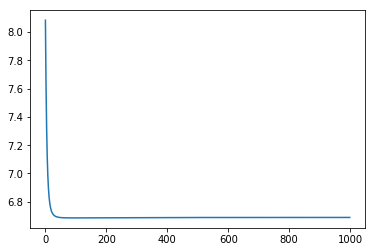

In [7]:
plt.plot(errors)

In [8]:
np.mean(n.error(X, y))

6.68928709084149

Text(0, 0.5, 'Predicted values')

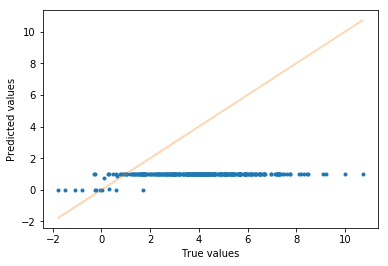

In [9]:
plt.plot(y, n.predict(X), '.')
plt.plot(y, y, alpha=0.3)
plt.xlabel('True values')
plt.ylabel('Predicted values')

In [10]:
n._weights

array([107.78805125,   6.56252094,  30.90249939])

In [11]:
n._bias

array([180.43502101])

All I can come up with right now is that I need some kind of linear activation function at the end. To do that I will need a multilayer perceptron.